In [19]:
#Data Cleaning
import pandas as pd
import numpy as np
df=pd.read_csv('Feature.csv',index_col='iid')
man=df[df['gender']==0].drop(['expnum','gender'],axis=1)
woman=df[df['gender']==1].drop(['expnum','gender'],axis=1)
wdata=woman.dropna()
mdata=man.dropna()

In [21]:
dbw=wdata

<h4> Try different methods of clustering

In [22]:
#first try methods that don't need the number of clusters
from sklearn.cluster import AffinityPropagation
af = AffinityPropagation().fit(dbw)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
n_clusters_

24

In [23]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dbw, labels, metric='sqeuclidean'))

Silhouette Coefficient: 0.051


In [24]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(dbw)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_ 

2

In [47]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=50, n_clusters=None, threshold=10.85,compute_labels=True)
brc.fit(dbw)
brc.predict(dbw)

array([ 0,  4,  0,  0,  0,  0,  6,  2,  1,  1,  2,  2,  2,  3,  0,  0, 11,
        0,  0,  0,  2,  2,  0,  6,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  8,  0,  6,  4,  0,  8,  0,  0,  6,  0,  2,  0,  2,  6,
        6,  0,  4,  0,  4,  4, 12,  0,  0,  2,  2,  0,  0,  5,  0,  0,  2,
        0,  0,  0,  6,  2,  2, 10,  0,  0,  2,  6,  6,  0,  0,  0,  6,  8,
        2, 12,  4,  0,  0,  0,  0, 12,  0,  0, 10,  6,  0,  6,  7,  0, 10,
        0, 10,  0,  0,  0,  2,  2,  5,  6,  6,  8,  6,  9, 10,  0,  2,  0,
       11, 12, 11,  6,  4, 13,  6,  0,  6,  2,  2,  2,  0,  3,  6,  8,  2,
       14,  2,  0,  6,  0,  0,  8,  8,  6,  2,  8,  6,  0,  6,  0,  0,  6,
        0,  2, 10,  0,  0,  0,  0,  2,  6,  0,  8, 10,  0,  0,  0,  6,  8,
        0,  8,  2,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  6,  0,  6,
        3,  2,  0,  6,  0,  6,  0,  0,  2,  6,  0, 10,  6,  0,  0,  0,  0,
        6,  0,  8, 12,  8,  2,  6,  0,  0,  0,  0,  4,  2,  8,  2,  8,  2,
        6,  0,  0,  2,  0

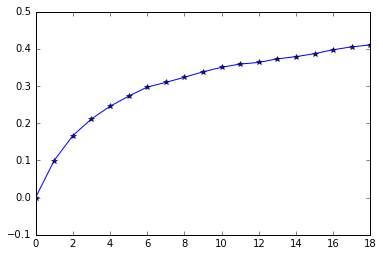

In [71]:

#elbow line 
import matplotlib.pyplot as plt
%matplotlib inline 

kMeansVar = [KMeans(n_clusters=k,init='k-means++',n_init=30).fit(wdata) for k in range(1, 20)]
centroids = [X.cluster_centers_ for X in kMeansVar]
k_euclid = [cdist(wdata, cent,'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(wdata)**2)/wdata.shape[0]
bss = tss - wcss
plt.plot(bss/tss,'*-')
plt.show()



In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, init='k-means++',n_init=30)
wdata['cluster']=km.fit_predict(wdata)
mdata['cluster']=km.fit_predict(mdata)

/Users/ryjtu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ryjtu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 11 to 552
Data columns (total 28 columns):
age         272 non-null float64
field_cd    272 non-null float64
race        272 non-null float64
date        272 non-null float64
go_out      272 non-null float64
sports      272 non-null float64
tvsports    272 non-null float64
exercise    272 non-null float64
dining      272 non-null float64
museums     272 non-null float64
art         272 non-null float64
hiking      272 non-null float64
gaming      272 non-null float64
clubbing    272 non-null float64
reading     272 non-null float64
tv          272 non-null float64
theater     272 non-null float64
movies      272 non-null float64
concerts    272 non-null float64
music       272 non-null float64
shopping    272 non-null float64
yoga        272 non-null float64
attr3_1     272 non-null float64
sinc3_1     272 non-null float64
fun3_1      272 non-null float64
intel3_1    272 non-null float64
amb3_1      272 non-null float64
clu

In [24]:
wnx=wdata.iloc[:,:27]
wny=wdata['cluster']

In [25]:
#neural network
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wnx, wny, test_size=0.3)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
clf=MLPClassifier(activation='logistic',solver='lbfgs')
clf.fit(X_train,y_train)
clf.predict(X_test)

array([1, 3, 1, 6, 5, 4, 0, 5, 4, 2, 5, 2, 5, 0, 0, 3, 5, 2, 1, 1, 3, 5, 4,
       0, 1, 4, 6, 2, 1, 6, 3, 1, 1, 0, 2, 3, 5, 6, 1, 1, 5, 5, 5, 2, 5, 0,
       0, 3, 0, 0, 0, 3, 3, 5, 4, 5, 5, 3, 0, 4, 4, 6, 3, 2, 2, 0, 0, 4, 2,
       2, 0, 5, 3, 0, 1, 0, 0, 3, 3, 5, 2, 2], dtype=int32)

In [53]:
y_test

iid
220    1
504    3
101    1
398    6
315    5
503    4
160    0
284    5
231    4
464    0
332    5
49     2
423    5
367    0
316    0
403    3
245    5
55     2
543    2
291    1
462    3
361    5
552    4
373    0
53     5
170    4
162    6
377    2
111    1
310    6
      ..
66     3
250    5
407    4
547    5
427    5
453    3
425    0
490    4
450    4
536    6
168    3
541    2
173    2
321    0
292    0
187    4
122    2
440    2
546    0
365    5
18     3
229    0
539    2
334    5
375    0
279    3
465    3
275    5
226    2
14     2
Name: cluster, dtype: int32

In [49]:
score=y_test-clf.predict(X_test)
score=pd.DataFrame(score)

In [54]:
score

,cluster
iid,
220,0
504,0
101,0
398,0
315,0
503,0
160,0
284,1
231,0


In [56]:
#accuracy
len(score[score['cluster']==0])/len(score)

0.8414634146341463